In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori

In [2]:
data = pd.read_csv('Market_Basket.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(7501, 20)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [7]:
 data_list=(data.to_numpy())
 data_list

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., nan, nan, nan],
       ['chutney', nan, nan, ..., nan, nan, nan],
       ...,
       ['chicken', nan, nan, ..., nan, nan, nan],
       ['escalope', 'green tea', nan, ..., nan, nan, nan],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., nan, nan, nan]],
      dtype=object)

In [8]:
 #Use Series
 x=pd.Series(data_list.flatten())
 x.dropna(inplace=True)

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_30992\885992354.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


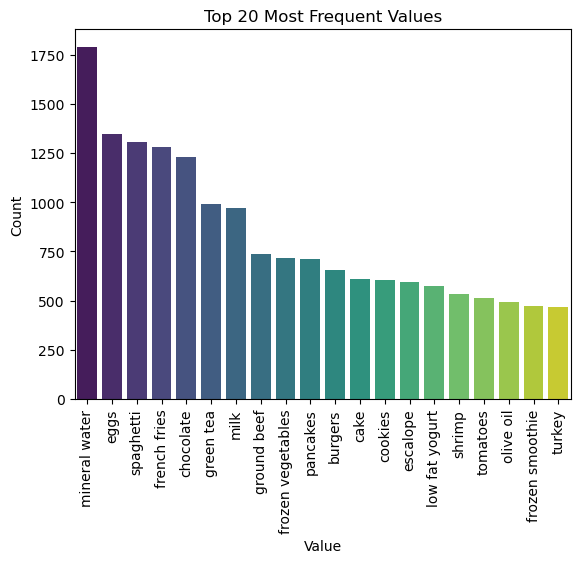

In [9]:
sns.barplot(
    x=x.value_counts().head(20).index,
    y=x.value_counts().head(20).values,
    palette="viridis" 
)
plt.xticks(rotation=90)
plt.title("Top 20 Most Frequent Values")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()



In [23]:

# Remove NaN values 
notnull = [
for i in data.values.tolist():
    row = [j for j in i if not pd.isna(j)]
    notnull.append(row)


notnull


[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

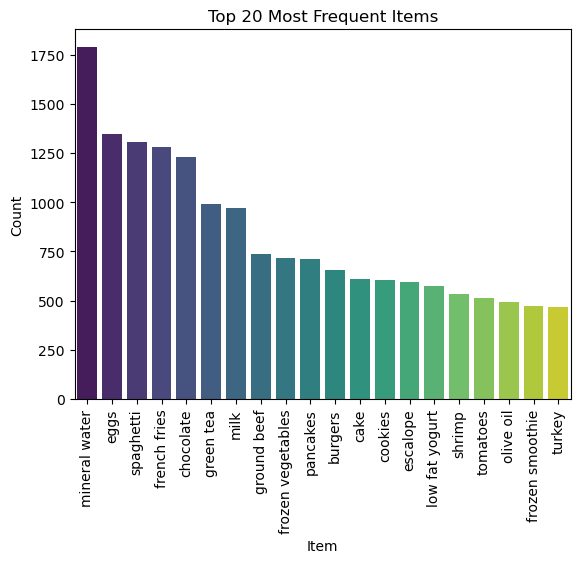

In [25]:
all_items = [item for sublist in notnull for item in sublist]

x = pd.Series(all_items)

top20 = x.value_counts().head(20)

sns.barplot(
    x=top20.index,
    y=top20.values,
    palette="viridis",
    hue=top20.index,    
    legend=False      
)

plt.xticks(rotation=90)
plt.title("Top 20 Most Frequent Items")
plt.xlabel("Item")
plt.ylabel("Count")
plt.show()


In [27]:

# Apriori algorithm
rules = apriori(
    transactions=notnull,
    min_support=0.005,
    min_confidence=0.5,
    min_lift=1,
    min_length=2
)

# Convert results to a list
rl1 = list(rules)
rl1


[RelationRecord(items=frozenset({'chicken', 'mineral water', 'chocolate'}), support=0.007598986801759766, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken', 'chocolate'}), items_add=frozenset({'mineral water'}), confidence=0.5181818181818182, lift=2.1738712629652226)]),
 RelationRecord(items=frozenset({'olive oil', 'chocolate', 'mineral water'}), support=0.008265564591387815, ordered_statistics=[OrderedStatistic(items_base=frozenset({'olive oil', 'chocolate'}), items_add=frozenset({'mineral water'}), confidence=0.5040650406504065, lift=2.1146486968225386)]),
 RelationRecord(items=frozenset({'chocolate', 'soup', 'mineral water'}), support=0.005599253432875617, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate', 'soup'}), items_add=frozenset({'mineral water'}), confidence=0.5526315789473685, lift=2.3183945602260687)]),
 RelationRecord(items=frozenset({'eggs', 'mineral water', 'cooking oil'}), support=0.006399146780429276, ordered_statistics=[Ordered

In [28]:
# Create empty lists
left1 = []
right1 = []
support1 = []
lift1 = []


for i in rl1:
    for rule_stat in i.ordered_statistics:
        if len(rule_stat.items_base) > 0:
            left1.append(list(rule_stat.items_base)[0])
            right1.append(list(rule_stat.items_add)[0])
            support1.append(i.support)
            lift1.append(rule_stat.lift)

data = pd.DataFrame({
    'X': left1,
    'Y': right1,
    'Support': support1,
    'Lift': lift1
})


data


,X,Y,Support,Lift
0,chicken,mineral water,0.007599,2.173871
1,olive oil,mineral water,0.008266,2.114649
2,chocolate,mineral water,0.005599,2.318395
3,eggs,mineral water,0.006399,2.288286
4,eggs,mineral water,0.010132,2.125563
5,ground beef,mineral water,0.009199,2.279277
6,ground beef,spaghetti,0.008666,2.939582
7,frozen vegetables,mineral water,0.006532,2.418404
8,frozen vegetables,mineral water,0.005066,2.656954
9,frozen vegetables,spaghetti,0.005733,2.905531


In [29]:

rules = apriori(
    transactions=notnull,
    min_support=0.01,     
    min_confidence=0.4,    
    min_lift=1,
    min_length=2
)


rl2 = list(rules)
rl2


[RelationRecord(items=frozenset({'ground beef', 'mineral water'}), support=0.040927876283162246, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), items_add=frozenset({'mineral water'}), confidence=0.41655359565807326, lift=1.7475215442008991)]),
 RelationRecord(items=frozenset({'olive oil', 'mineral water'}), support=0.027596320490601255, ordered_statistics=[OrderedStatistic(items_base=frozenset({'olive oil'}), items_add=frozenset({'mineral water'}), confidence=0.4190283400809717, lift=1.7579035676439423)]),
 RelationRecord(items=frozenset({'salmon', 'mineral water'}), support=0.017064391414478068, ordered_statistics=[OrderedStatistic(items_base=frozenset({'salmon'}), items_add=frozenset({'mineral water'}), confidence=0.4012539184952978, lift=1.6833364891684726)]),
 RelationRecord(items=frozenset({'soup', 'mineral water'}), support=0.023063591521130515, ordered_statistics=[OrderedStatistic(items_base=frozenset({'soup'}), items_add=frozenset({'mineral water'})

In [39]:

left2 = []
right2 = []
support2 = []
lift2 = []

for i in rl2:
    for rule_stat in i.ordered_statistics:
        if len(rule_stat.items_base) > 0:
            left2.append(list(rule_stat.items_base)[0])
            right2.append(list(rule_stat.items_add)[0])
            support2.append(i.support)
            lift2.append(rule_stat.lift)

data = pd.DataFrame({
    'X': left2,
    'Y': right2,
    'Support': support2,
    'Lift': lift2
})


data


,X,Y,Support,Lift
0,ground beef,mineral water,0.040928,1.747522
1,olive oil,mineral water,0.027596,1.757904
2,salmon,mineral water,0.017064,1.683336
3,soup,mineral water,0.023064,1.914955
4,eggs,mineral water,0.013465,1.701663
5,ground beef,mineral water,0.010932,1.988472
6,milk,mineral water,0.013998,1.827780
7,spaghetti,mineral water,0.015865,1.698053
8,eggs,mineral water,0.010132,2.125563
9,eggs,mineral water,0.013065,1.779778


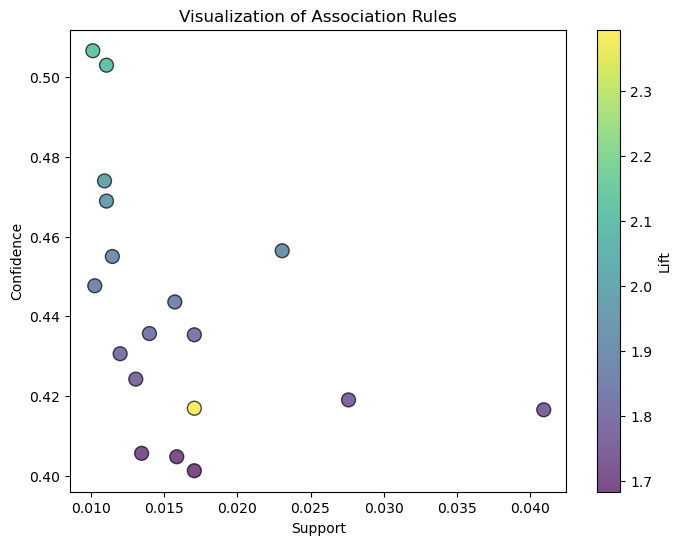

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(
    results_data['Support'],
    results_data['Confidence'],
    c=results_data['Lift'],
    cmap='viridis',
    s=100,
    edgecolors='k',
    alpha=0.7
)

plt.title('Visualization of Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(label='Lift')
plt.show()
